# -*- coding: utf-8 -*-
"""
Updated 2019.09.09

@author: Kristian Hovde Liland
"""

"""
Titanic survival

Test your Kaggle connection from Colab.
- Download titanic survival data (https://www.kaggle.com/c/titanic/data)
- Make dataset more complete
    - Apply OneHotEncoder
    - Apply SimpleImputer
    - More ...
- Make prediction of survival rate
"""

In [116]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
#import Dataframes as df
#import utils as utils


In [117]:
data_gender = pd.read_csv("gender_submission.csv") 
data_gender.head()

data_train = pd.read_csv("train.csv") 
data_train.head()

data_test = pd.read_csv("test.csv") 
data_test.head()

full_data = data_train.append(data_test, sort=False)
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
type(full_data)

pandas.core.frame.DataFrame

In [119]:
np.shape(full_data)

(1309, 12)

In [120]:
X = full_data.columns[4]

In [121]:
df_tot = full_data.set_index('PassengerId', drop = True)
df_tot.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df_sex = df_tot.loc[: ,'Sex']
df_sex.head()

PassengerId
1      male
2    female
3    female
4    female
5      male
Name: Sex, dtype: object

In [123]:
leb = LabelEncoder()
leb_sex = leb.fit_transform(df_sex)
leb_sex

array([1, 0, 0, ..., 1, 1, 1])

In [124]:
#leb_sex = leb_sex.reshape(-1, 1)
#print (leb_sex)

In [125]:
df_sex = pd.get_dummies(df_sex)
df_sex.head()

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [126]:
df_emb = df_tot.loc[: ,'Embarked']
df_emb.head()

PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: object

In [127]:
df_emb = pd.get_dummies(df_emb)
df_emb.head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [128]:
df_tot2  = df_tot.join([df_sex, df_emb])


In [129]:
df_tot2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [130]:
df_tot2 = df_tot2.drop(columns=['Sex', 'Embarked'], axis=1)

In [131]:
df_tot2.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [132]:
X = df_tot2.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


In [133]:
X.isna().head(); X.fillna(0, inplace=True)

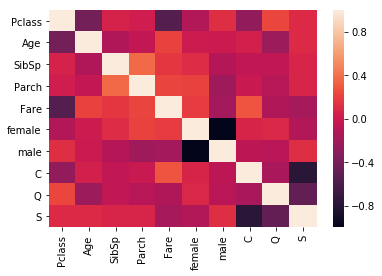

In [136]:
import seaborn as sns

X.corr()
sns.heatmap(X.corr())

In [137]:
y = df_tot2.loc[:, 'Survived']
y.fillna(0, inplace=True)
y.isna().head()

PassengerId
1    False
2    False
3    False
4    False
5    False
Name: Survived, dtype: bool

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [140]:
X_train.head()
y_train.head()
X_test.head()
y_test.head()

PassengerId
1149    0.0
1050    0.0
983     0.0
809     0.0
1196    0.0
Name: Survived, dtype: float64

In [141]:
from sklearn.linear_model import LinearRegression


In [142]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
y_pred = lin.predict(X_test)

In [144]:
# The coefficients
print('Coefficients: \n', lin.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-1.13229281e-01 -2.52751875e-03 -2.65172203e-02  3.11255918e-04
 -5.85402984e-05  1.68128988e-01 -1.68128988e-01 -3.97893896e-01
 -4.46390691e-01 -4.38679826e-01]
Mean squared error: 0.15
Variance score: 0.23


In [145]:
X_test.shape
y_test.shape
X_train.shape
y_train.shape
y_pred.shape

(432,)

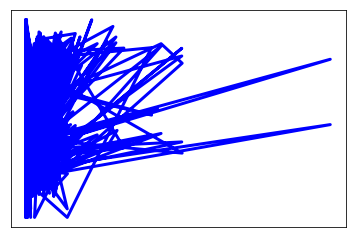

In [146]:
# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()